In [2]:
!pip install -q tensorflow

import numpy as np
import tensorflow as tf
import random as rn

You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


In [3]:
import os
os.environ['PYTHONHASHSEED'] = '0'

np.random.seed(37)
rn.seed(1254)
tf.random.set_seed(89)

In [4]:
from tensorflow.python.keras import backend as K

# force tensorflow to use a single thread
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=config)
K.set_session(sess)

In [5]:
## Imports libs
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

from tensorflow.keras import layers
from keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

Segmentation Models: using `tf.keras` framework.


Using TensorFlow backend.


In [6]:
!pip install -U -q segmentation-models
!pip install -q keras
!pip install -q tensorflow-estimator

import pandas as pd
import cv2
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from PIL import Image
from random import shuffle
from tqdm import tqdm
import pandas as pd
from sklearn.utils import class_weight

import pickle

from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Model,Sequential, load_model,model_from_json
from tensorflow.keras.applications import mobilenet,mobilenet_v2,densenet,inception_resnet_v2,inception_v3,vgg16,resnet_v2,resnet
#from tensorflow.keras.utils.generic_utils import CustomObjectScope
from tensorflow.keras.layers import Flatten, Dropout,GlobalAveragePooling2D,Activation, Conv2D, Reshape,DepthwiseConv2D,Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, Callback, CSVLogger, EarlyStopping
from tensorflow.keras.metrics import top_k_categorical_accuracy
from sklearn.metrics import confusion_matrix

You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


In [7]:
BATCH_SIZE=80
INPUT_SIZE = (224, 224)

In [8]:
def mobilenet_preprocess_input(x,**kwargs):
    x[..., 0] -= 103.939
    x[..., 1] -= 116.779
    x[..., 2] -= 123.68
    return x
preprocessing_function=mobilenet_preprocess_input
        
BATCH_SIZE=80
INPUT_SIZE = (224, 224)

In [8]:
target_size = (224, 224)

train_datagen = ImageDataGenerator(preprocessing_function=preprocessing_function, horizontal_flip = True)

training_set_1 = train_datagen.flow_from_directory(r'C:\Users\HP\SLR\crossVal\Data\fold_1_c\train_files',
                                                 target_size=target_size,
                                                 batch_size=BATCH_SIZE, class_mode='categorical',follow_links=True)


training_set_2 = train_datagen.flow_from_directory(r'C:\Users\HP\SLR\crossVal\Data\fold_2_c\train_files',
                                                 target_size=target_size,
                                                 batch_size=BATCH_SIZE, class_mode='categorical',follow_links=True)


training_set_3 = train_datagen.flow_from_directory(r'C:\Users\HP\SLR\crossVal\Data\fold_3_c\train_files',
                                                 target_size=target_size,
                                                 batch_size=BATCH_SIZE, class_mode='categorical',follow_links=True)


training_set_4 = train_datagen.flow_from_directory(r'C:\Users\HP\SLR\crossVal\Data\fold_4_c\train_files',
                                                 target_size=target_size,
                                                 batch_size=BATCH_SIZE, class_mode='categorical',follow_links=True)


training_set_5 = train_datagen.flow_from_directory(r'C:\Users\HP\SLR\crossVal\Data\fold_5_c\train_files',
                                                 target_size=target_size,
                                                 batch_size=BATCH_SIZE, class_mode='categorical',follow_links=True)

training_set = [training_set_1, training_set_2, training_set_3, training_set_4, training_set_5]

Found 2024 images belonging to 7 classes.
Found 2024 images belonging to 7 classes.
Found 2024 images belonging to 7 classes.
Found 2024 images belonging to 7 classes.
Found 2024 images belonging to 7 classes.


In [9]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocessing_function)


test_set_1 = test_datagen.flow_from_directory(r'C:\Users\HP\SLR\crossVal\Data\fold_1_c\test_files',
                                            target_size=target_size,
                                            batch_size=BATCH_SIZE, class_mode='categorical',follow_links=True)


test_set_2 = test_datagen.flow_from_directory(r'C:\Users\HP\SLR\crossVal\Data\fold_2_c\test_files',
                                            target_size=target_size,
                                            batch_size=BATCH_SIZE, class_mode='categorical',follow_links=True)


test_set_3 = test_datagen.flow_from_directory(r'C:\Users\HP\SLR\crossVal\Data\fold_3_c\test_files',
                                            target_size=target_size,
                                            batch_size=BATCH_SIZE, class_mode='categorical',follow_links=True)


test_set_4 = test_datagen.flow_from_directory(r'C:\Users\HP\SLR\crossVal\Data\fold_4_c\test_files',
                                            target_size=target_size,
                                            batch_size=BATCH_SIZE, class_mode='categorical',follow_links=True)


test_set_5 = test_datagen.flow_from_directory(r'C:\Users\HP\SLR\crossVal\Data\fold_5_c\test_files',
                                            target_size=target_size,
                                            batch_size=BATCH_SIZE, class_mode='categorical',follow_links=True)

testing_set = [test_set_1, test_set_2, test_set_3, test_set_4, test_set_5]

Found 507 images belonging to 7 classes.
Found 507 images belonging to 7 classes.
Found 507 images belonging to 7 classes.
Found 507 images belonging to 7 classes.
Found 507 images belonging to 7 classes.


# Training 

In [9]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [11]:
# Cross Validation
k = 1
acc_per_fold = []
loss_per_fold = []
for (train, test) in zip(training_set, testing_set):
    
    # Downloading the pre-trained model
    model = load_model(r'C:\Users\HP\SLR\models\affectnet_emotions\mobilenet_7.h5')
    
    def count_params(model):
        non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
        trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
        return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

    params = count_params(model)
    assert params['non_trainable_params'] == 21888
    assert params['trainable_params'] == 3471175
    
    new_model = Sequential()
    
    # removing the last prediction layer 
    for layer in model.layers[:-1]:
        new_model.add(layer)
        
    # freezing the previous layers
    for layer in new_model.layers:
        layer.trainable = False
    
    # adding a new dense layer 
    new_model.add(Dense(units=7, input_shape=(224,224), activation='softmax'))
    
    print("Training model number: " + str(k))
    
    # training only the last layer 
    print("Training on the last layer:")
    params = count_params(new_model)
    assert params['non_trainable_params'] == 3491264
    # only the parameters in the last layer are trainable
    assert params['trainable_params'] == 1799
    
    
    new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    nb_train_samples = 2024
    nb_validation_samples = 507
    
    if k==1: net_description = 'Model_1.h5'
    elif k==2: net_description = 'Model_2.h5'
    elif k==3: net_description = 'Model_3.h5'
    elif k==4: net_description = 'Model_4.h5'
    elif k==5: net_description = 'Model_5.h5'
   
    mc = ModelCheckpoint(net_description, monitor='val_accuracy', verbose=1, save_best_only=True)
    es=EarlyStopping(monitor='val_accuracy',patience=2)
    FIRST_EPOCHS=3

    hist1=new_model.fit(train, steps_per_epoch=nb_train_samples//BATCH_SIZE, epochs=FIRST_EPOCHS, verbose=1, 
                        initial_epoch=0, callbacks=[mc, es], validation_data=test, validation_steps=nb_validation_samples // BATCH_SIZE)
    
    
    # Unfreezing the previous layer & retraining the model with all layers    
    start_epoch=len(hist1.history['loss'])

    for layer in new_model.layers:
        layer.trainable = True

    params = count_params(new_model)
    assert params['non_trainable_params'] == 21888
    # only the parameters in the last layer are trainable
    assert params['trainable_params'] == 3471175 
    
    
    new_model.load_weights(net_description)

    new_model.compile(optimizer=Adam(learning_rate=1e-4,decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
    
    SECOND_EPOCHS=start_epoch+5
    
    if k==1: net_description = 'Model_1_ft.h5'
    elif k==2: net_description = 'Model_2_ft.h5'
    elif k==3: net_description = 'Model_3_ft.h5'
    elif k==4: net_description = 'Model_4_ft.h5'
    elif k==5: net_description = 'Model_5_ft.h5'
    
    mc = ModelCheckpoint(net_description, monitor='val_accuracy', verbose=1, save_best_only=True)
    #es=EarlyStopping(monitor='val_accuracy',patience=2 )

    print('All tuning')
    hist2=new_model.fit(train, steps_per_epoch=train.samples//BATCH_SIZE, epochs=SECOND_EPOCHS, verbose=1, 
                        initial_epoch=start_epoch, validation_data=test, validation_steps=test.samples // BATCH_SIZE, callbacks=[mc])
    
    new_model.load_weights(net_description)
    
    new_model.compile(optimizer=SGD(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
    
    if k==1: net_description = 'Model_1_ft_sgd.h5'
    elif k==2: net_description = 'Model_2_ft_sgd.h5'
    elif k==3: net_description = 'Model_3_ft_sgd.h5'
    elif k==4: net_description = 'Model_4_ft_sgd.h5'
    elif k==5: net_description = 'Model_5_ft_sgd.h5'
    
    mc = ModelCheckpoint(net_description, monitor='val_accuracy', verbose=1, save_best_only=True)
    second_epoch=start_epoch+len(hist2.history['loss'])
    THIRD_EPOCHS=2+second_epoch

    print('ALL SGD tuning')
    hist3=new_model.fit_generator(train, steps_per_epoch=train.samples//BATCH_SIZE, epochs=THIRD_EPOCHS, verbose=1, 
                    initial_epoch=second_epoch, validation_data=test, validation_steps=test.samples // BATCH_SIZE,callbacks=[mc])
    
    print('Model number: ' + str(k) + ' compiled!')
    
    
    # Evaluation
    USE_PREPROCESSING=True
    
    import numpy as np
    y_val=np.array(test.labels)
    y_scores_val=[]
    #new_model.load_weights(net_description+'_ft.h5')
    for filepath in log_progress(test.filepaths):
        img=cv2.imread(filepath)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,INPUT_SIZE)
        if USE_PREPROCESSING:
            inp = preprocessing_function(np.expand_dims(img, axis=0).astype(np.float32))
        else:
            inp=img.astype(np.float32)
            inp[..., 0] -= 103.939
            inp[..., 1] -= 116.779
            inp[..., 2] -= 123.68
            inp = np.expand_dims(inp, axis=0)

        scores=new_model.predict(inp)
        #print(scores)
        y_scores_val.append(scores)

    y_scores_val=np.concatenate(y_scores_val, axis=0)
    
    
    # Accuracy
    idx_to_class={0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}

    y_pred=np.argmax(y_scores_val,axis=1)
    acc=100.0*(y_val==y_pred).sum()/len(y_val)
    print('Accuracy:',acc)

    y_train=np.array(train.labels)

    for i in range(y_scores_val.shape[1]):
        _val_acc=(y_pred[y_val==i]==i).sum()/(y_val==i).sum()
        print('%s %d/%d acc: %f' %(idx_to_class[i],(y_train==i).sum(),(y_val==i).sum(),100*_val_acc))
        
        
    from sklearn.metrics import classification_report

    target_names = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', 'Surprise']
    print(classification_report(y_val, y_pred, target_names=target_names))
    
          
    k=k+1

    

Training model number: 1
Training on the last layer:
Epoch 1/3
25/25 [==============================] - 69s 3s/step - loss: 2.3172 - accuracy: 0.1091 - val_loss: 1.9352 - val_accuracy: 0.1646

Epoch 00001: val_accuracy improved from -inf to 0.16458, saving model to Model_1.h5
Epoch 2/3
25/25 [==============================] - 78s 3s/step - loss: 1.7346 - accuracy: 0.3318 - val_loss: 1.6907 - val_accuracy: 0.3250

Epoch 00002: val_accuracy improved from 0.16458 to 0.32500, saving model to Model_1.h5
Epoch 3/3
25/25 [==============================] - 75s 3s/step - loss: 1.5363 - accuracy: 0.4434 - val_loss: 1.5518 - val_accuracy: 0.4042

Epoch 00003: val_accuracy improved from 0.32500 to 0.40417, saving model to Model_1.h5
All tuning
Epoch 4/8
25/25 [==============================] - 339s 13s/step - loss: 1.3752 - accuracy: 0.5062 - val_loss: 1.3769 - val_accuracy: 0.4500

Epoch 00004: val_accuracy improved from -inf to 0.45000, saving model to Model_1_ft.h5
Epoch 5/8
25/25 [============

c:\program files\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 9/10
25/25 [==============================] - 309s 12s/step - loss: 0.5646 - accuracy: 0.8076 - val_loss: 1.0514 - val_accuracy: 0.6458

Epoch 00009: val_accuracy improved from -inf to 0.64583, saving model to Model_1_ft_sgd.h5
Epoch 10/10
25/25 [==============================] - 285s 11s/step - loss: 0.5794 - accuracy: 0.8014 - val_loss: 1.0452 - val_accuracy: 0.6562

Epoch 00010: val_accuracy improved from 0.64583 to 0.65625, saving model to Model_1_ft_sgd.h5
Model number: 1 compiled!


Accuracy: 66.0749506903353
Anger 359/144 acc: 66.666667
Disgust 132/55 acc: 58.181818
Fear 254/54 acc: 29.629630
Happiness 155/24 acc: 54.166667
Neutral 164/31 acc: 83.870968
Sadness 298/51 acc: 35.294118
Surprise 662/148 acc: 90.540541
              precision    recall  f1-score   support

       Anger       0.70      0.67      0.68       144
     Disgust       0.64      0.58      0.61        55
        Fear       0.43      0.30      0.35        54
       Happy       0.62      0.54      0.58        24
     Neutral       0.70      0.84      0.76        31
     Sadness       0.43      0.35      0.39        51
    Surprise       0.73      0.91      0.81       148

    accuracy                           0.66       507
   macro avg       0.61      0.60      0.60       507
weighted avg       0.64      0.66      0.65       507

Training model number: 2
Training on the last layer:
Epoch 1/3
25/25 [==============================] - 72s 3s/step - loss: 1.8824 - accuracy: 0.2495 - val_loss: 1.75

c:\program files\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 9/10
25/25 [==============================] - 295s 11s/step - loss: 0.5335 - accuracy: 0.8313 - val_loss: 1.1186 - val_accuracy: 0.5896

Epoch 00009: val_accuracy improved from -inf to 0.58958, saving model to Model_2_ft_sgd.h5
Epoch 10/10
25/25 [==============================] - 286s 11s/step - loss: 0.5453 - accuracy: 0.8272 - val_loss: 1.1305 - val_accuracy: 0.5917

Epoch 00010: val_accuracy improved from 0.58958 to 0.59167, saving model to Model_2_ft_sgd.h5
Model number: 2 compiled!


Accuracy: 58.57988165680474
Anger 412/92 acc: 69.565217
Disgust 143/44 acc: 43.181818
Fear 259/49 acc: 36.734694
Happiness 135/44 acc: 52.272727
Neutral 141/54 acc: 22.222222
Sadness 277/71 acc: 50.704225
Surprise 657/153 acc: 81.699346
              precision    recall  f1-score   support

       Anger       0.60      0.70      0.65        92
     Disgust       0.44      0.43      0.44        44
        Fear       0.60      0.37      0.46        49
       Happy       0.66      0.52      0.58        44
     Neutral       0.57      0.22      0.32        54
     Sadness       0.43      0.51      0.47        71
    Surprise       0.66      0.82      0.73       153

    accuracy                           0.59       507
   macro avg       0.57      0.51      0.52       507
weighted avg       0.58      0.59      0.57       507

Training model number: 3
Training on the last layer:
Epoch 1/3
25/25 [==============================] - 74s 3s/step - loss: 1.7978 - accuracy: 0.3138 - val_loss: 1.67

c:\program files\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 9/10
25/25 [==============================] - 290s 11s/step - loss: 0.6417 - accuracy: 0.7747 - val_loss: 1.0258 - val_accuracy: 0.6354

Epoch 00009: val_accuracy improved from -inf to 0.63542, saving model to Model_3_ft_sgd.h5
Epoch 10/10
25/25 [==============================] - 272s 11s/step - loss: 0.6246 - accuracy: 0.7912 - val_loss: 1.0338 - val_accuracy: 0.6354

Epoch 00010: val_accuracy did not improve from 0.63542
Model number: 3 compiled!


Accuracy: 63.905325443786985
Anger 414/90 acc: 81.111111
Disgust 163/24 acc: 33.333333
Fear 210/98 acc: 22.448980
Happiness 160/19 acc: 63.157895
Neutral 147/48 acc: 54.166667
Sadness 270/79 acc: 77.215190
Surprise 660/149 acc: 81.879195
              precision    recall  f1-score   support

       Anger       0.66      0.81      0.73        90
     Disgust       0.47      0.33      0.39        24
        Fear       0.76      0.22      0.35        98
       Happy       0.80      0.63      0.71        19
     Neutral       0.57      0.54      0.55        48
     Sadness       0.59      0.77      0.67        79
    Surprise       0.65      0.82      0.73       149

    accuracy                           0.64       507
   macro avg       0.64      0.59      0.59       507
weighted avg       0.65      0.64      0.61       507

Training model number: 4
Training on the last layer:
Epoch 1/3
25/25 [==============================] - 72s 3s/step - loss: 1.9058 - accuracy: 0.3040 - val_loss: 1.7

c:\program files\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 9/10
25/25 [==============================] - 291s 11s/step - loss: 0.5613 - accuracy: 0.8189 - val_loss: 1.0044 - val_accuracy: 0.6354

Epoch 00009: val_accuracy improved from -inf to 0.63542, saving model to Model_4_ft_sgd.h5
Epoch 10/10
25/25 [==============================] - 286s 11s/step - loss: 0.5605 - accuracy: 0.8169 - val_loss: 0.9859 - val_accuracy: 0.6417

Epoch 00010: val_accuracy improved from 0.63542 to 0.64167, saving model to Model_4_ft_sgd.h5
Model number: 4 compiled!


Accuracy: 63.905325443786985
Anger 435/68 acc: 77.941176
Disgust 158/29 acc: 51.724138
Fear 237/71 acc: 15.492958
Happiness 131/48 acc: 64.583333
Neutral 159/36 acc: 44.444444
Sadness 289/60 acc: 55.000000
Surprise 615/195 acc: 84.615385
              precision    recall  f1-score   support

       Anger       0.60      0.78      0.68        68
     Disgust       0.48      0.52      0.50        29
        Fear       0.46      0.15      0.23        71
       Happy       0.66      0.65      0.65        48
     Neutral       0.38      0.44      0.41        36
     Sadness       0.72      0.55      0.62        60
    Surprise       0.72      0.85      0.78       195

    accuracy                           0.64       507
   macro avg       0.57      0.56      0.55       507
weighted avg       0.62      0.64      0.62       507

Training model number: 5
Training on the last layer:
Epoch 1/3
25/25 [==============================] - 73s 3s/step - loss: 1.8391 - accuracy: 0.3205 - val_loss: 1.6

c:\program files\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 9/10
25/25 [==============================] - 301s 12s/step - loss: 0.6522 - accuracy: 0.7978 - val_loss: 1.1873 - val_accuracy: 0.5979

Epoch 00009: val_accuracy improved from -inf to 0.59792, saving model to Model_5_ft_sgd.h5
Epoch 10/10
25/25 [==============================] - 315s 13s/step - loss: 0.6384 - accuracy: 0.7906 - val_loss: 1.1842 - val_accuracy: 0.5917

Epoch 00010: val_accuracy did not improve from 0.59792
Model number: 5 compiled!


Accuracy: 59.36883629191321
Anger 388/115 acc: 73.043478
Disgust 152/35 acc: 22.857143
Fear 272/36 acc: 13.888889
Happiness 135/44 acc: 34.090909
Neutral 169/26 acc: 46.153846
Sadness 262/87 acc: 67.816092
Surprise 646/164 acc: 71.951220
              precision    recall  f1-score   support

       Anger       0.53      0.73      0.62       115
     Disgust       0.57      0.23      0.33        35
        Fear       0.19      0.14      0.16        36
       Happy       0.75      0.34      0.47        44
     Neutral       0.27      0.46      0.34        26
     Sadness       0.75      0.68      0.71        87
    Surprise       0.72      0.72      0.72       164

    accuracy                           0.59       507
   macro avg       0.54      0.47      0.48       507
weighted avg       0.61      0.59      0.59       507



# Confusion Matrix

Found 507 images belonging to 7 classes.


[[ 96  13  13   4   4   4  10]
 [ 11  32   4   2   0   6   0]
 [  6   1  16   1   1   9  20]
 [  0   2   1  13   5   1   2]
 [  0   0   0   0  26   0   5]
 [ 16   2   1   1   1  18  12]
 [  8   0   2   0   0   4 134]]


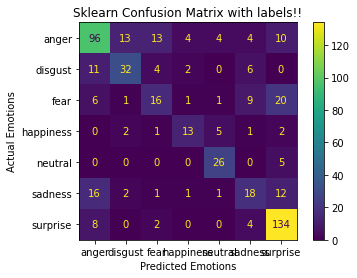

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt     

new_model_1 = load_model(r'C:\Users\HP\SLR\crossVal\MobileNet\Model_1_ft_sgd.h5')

target_size = (224, 224)
USE_PREPROCESSING=True
BATCH_SIZE = 80

test_datagen = ImageDataGenerator(preprocessing_function=preprocessing_function)

test_set_1 = test_datagen.flow_from_directory(r'C:\Users\HP\SLR\crossVal\Data\fold_1_c\test_files',
                                              target_size=target_size,batch_size=BATCH_SIZE, 
                                              class_mode='categorical',follow_links=True)

idx_to_class={0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}

import numpy as np
y_val=np.array(test_set.labels)
y_scores_val=[]
#new_model.load_weights(net_description+'_ft.h5')
for filepath in log_progress(test_set_1.filepaths):
    img=cv2.imread(filepath)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,INPUT_SIZE)
    if USE_PREPROCESSING:
        inp = preprocessing_function(np.expand_dims(img, axis=0).astype(np.float32))
    else:
        inp=img.astype(np.float32)
        inp[..., 0] -= 103.939
        inp[..., 1] -= 116.779
        inp[..., 2] -= 123.68
        inp = np.expand_dims(inp, axis=0)

    scores=new_model_1.predict(inp)
    #print(scores)
    y_scores_val.append(scores)

y_scores_val=np.concatenate(y_scores_val, axis=0)
#print(y_scores_val.shape,y_val.shape)

y_pred=np.argmax(y_scores_val,axis=1)

#ax.xaxis.set_ticklabels(['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']); 
#ax.yaxis.set_ticklabels(['surprise', 'sadness', 'neutral','happiness','fear','disgust','anger']);

cm = confusion_matrix(y_val, y_pred)
print(cm)

cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'])
cmd_obj.plot()

cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Emotions', 
                ylabel='Actual Emotions')

plt.show()

# Making a single prediction

In [12]:
from facial_analysis import FacialImageProcessing
imgProcessing=FacialImageProcessing(False)

NotFoundError: NewRandomAccessFile failed to Create/Open: C:\Users\HP\SLR\crossVal\MobileNet\..\models\pretrained_faces\mtcnn.pb : The system cannot find the path specified.
; No such process

[[0.16298212 0.03912505 0.18231936 0.04156695 0.29077086 0.25950918
  0.02372642]]


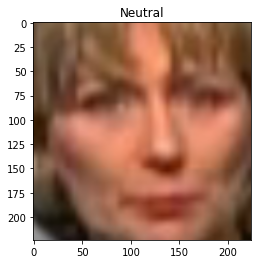

In [41]:
# For image 02August_2010_Monday_heute_default-7.avi_pid0_fn000008-0.png

INPUT_SIZE = (224, 224)
idx_to_class={0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}
filename = r'C:\Users\HP\SLR\test_files_1_sorted\07January_2010_Thursday_tagesschau_default-5.avi_pid0_fn000045-0.png'

img = plt.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,INPUT_SIZE)
frame_bgr=cv2.imread(filename)
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
bounding_boxes, points = imgProcessing.detect_faces(frame)
points = points.T
for bbox,p in zip(bounding_boxes, points):
    box = bbox.astype(np.int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]

    face_img=cv2.resize(face_img,INPUT_SIZE)

    plt.imshow(face_img)

    inp=face_img.astype(np.float32)
    inp[..., 0] -= 103.939
    inp[..., 1] -= 116.779
    inp[..., 2] -= 123.68
    inp = np.expand_dims(inp, axis=0)
    scores=new_model.predict(inp)
    plt.title(idx_to_class[np.argmax(scores)])

    print(scores)